In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import sys
sys.path.append("..")
from helper import *

In [2]:
DATA_PATH = "../../data"

## Create csv files

README: persons_organizations_co-occurences.csv files are too big to be included in the repo. This code is given as a reference only but is not meant to be executed.

**Create global_actors_co-occurences_25.csv**

In [32]:
# Read co-occurence data
df1 = pd.read_csv("persons_organizations_co-occurences(1).csv", usecols=['V1Persons', 'V1Organizations']).dropna()
df2 = pd.read_csv("persons_organizations_co-occurences(2).csv", usecols=['V1Persons', 'V1Organizations']).dropna()
df3 = pd.concat([df1, df2])

# Read occurence data
per_occ = pd.read_csv("persons_occurences.csv", nrows=25)
org_occ = pd.read_csv("organizations_occurences.csv", nrows=25)

# Create a dictionnary that maps an actor to its occurence
per_occ['Actor'] = per_occ['Actor'].apply(lambda x: x.replace(" ", "_"))
per_occ['Actor'] = per_occ['Actor'].apply(lambda x: x.replace("-", "_"))
per_occ_dict = per_occ.set_index('Actor').to_dict()['Count']
top_persons = list(per_occ_dict.keys())
org_occ['Actor'] = org_occ['Actor'].apply(lambda x: x.replace(" ", "_"))
org_occ['Actor'] = org_occ['Actor'].apply(lambda x: x.replace("-", "_"))
org_occ_dict = org_occ.set_index('Actor').to_dict()['Count']
top_organizations = list(org_occ_dict.keys())
actor_occ_dict = dict(per_occ_dict, **org_occ_dict)

# Filter and clean dataframe
df = df3.copy()
df['V1Persons'] = df["V1Persons"].str.replace(" ","_")
df['V1Persons'] = df["V1Persons"].str.replace("-","_")
df['V1Organizations'] = df["V1Organizations"].str.replace(" ","_")
df['V1Organizations'] = df["V1Organizations"].str.replace("-","_")
df['V1Persons'] = df["V1Persons"].str.replace(";"," ")
df['V1Persons'] = df['V1Persons'].apply(lambda x: ' '.join([y for y in x.split() if y in top_persons]))
df['V1Organizations'] = df["V1Organizations"].str.replace(";"," ")
df['V1Organizations'] = df['V1Organizations'].apply(lambda x: ' '.join([y for y in x.split() if y in top_organizations]))
df["actors"] = df["V1Persons"].map(str) + ' ' + df["V1Organizations"]
df = df.drop(columns=['V1Persons', 'V1Organizations'])

df['totalwords'] = df['actors'].str.split().str.len()
df = df.loc[df['totalwords'] >= 2]
df = df.drop(columns=['totalwords'])

df.to_csv('global_actors_co-occurences_25.csv', index=False)

**Create global_actors_co-occurences_25.csv**

In [39]:
# Read co-occurence data
df1 = pd.read_csv("persons_organizations_co-occurences(1).csv", usecols=['V1Persons', 'V1Organizations']).dropna()
df2 = pd.read_csv("persons_organizations_co-occurences(2).csv", usecols=['V1Persons', 'V1Organizations']).dropna()
df3 = pd.concat([df1, df2])

# Read occurence data
per_occ = pd.read_csv("persons_occurences.csv", nrows=50)
org_occ = pd.read_csv("organizations_occurences.csv", nrows=50)

# Create a dictionnary that maps an actor to its occurence
per_occ['Actor'] = per_occ['Actor'].apply(lambda x: x.replace(" ", "_"))
per_occ['Actor'] = per_occ['Actor'].apply(lambda x: x.replace("-", "_"))
per_occ_dict = per_occ.set_index('Actor').to_dict()['Count']
top_persons = list(per_occ_dict.keys())
org_occ['Actor'] = org_occ['Actor'].apply(lambda x: x.replace(" ", "_"))
org_occ['Actor'] = org_occ['Actor'].apply(lambda x: x.replace("-", "_"))
org_occ_dict = org_occ.set_index('Actor').to_dict()['Count']
top_organizations = list(org_occ_dict.keys())
actor_occ_dict = dict(per_occ_dict, **org_occ_dict)

# Filter and clean dataframe
df = df3.copy()
df['V1Persons'] = df["V1Persons"].str.replace(" ","_")
df['V1Persons'] = df["V1Persons"].str.replace("-","_")
df['V1Organizations'] = df["V1Organizations"].str.replace(" ","_")
df['V1Organizations'] = df["V1Organizations"].str.replace("-","_")
df['V1Persons'] = df["V1Persons"].str.replace(";"," ")
df['V1Persons'] = df['V1Persons'].apply(lambda x: ' '.join([y for y in x.split() if y in top_persons]))
df['V1Organizations'] = df["V1Organizations"].str.replace(";"," ")
df['V1Organizations'] = df['V1Organizations'].apply(lambda x: ' '.join([y for y in x.split() if y in top_organizations]))
df["actors"] = df["V1Persons"].map(str) + ' ' + df["V1Organizations"]
df = df.drop(columns=['V1Persons', 'V1Organizations'])

df['totalwords'] = df['actors'].str.split().str.len()
df = df.loc[df['totalwords'] >= 2]
df = df.drop(columns=['totalwords'])

df.to_csv('global_actors_co-occurences_50.csv', index=False)

## Example output

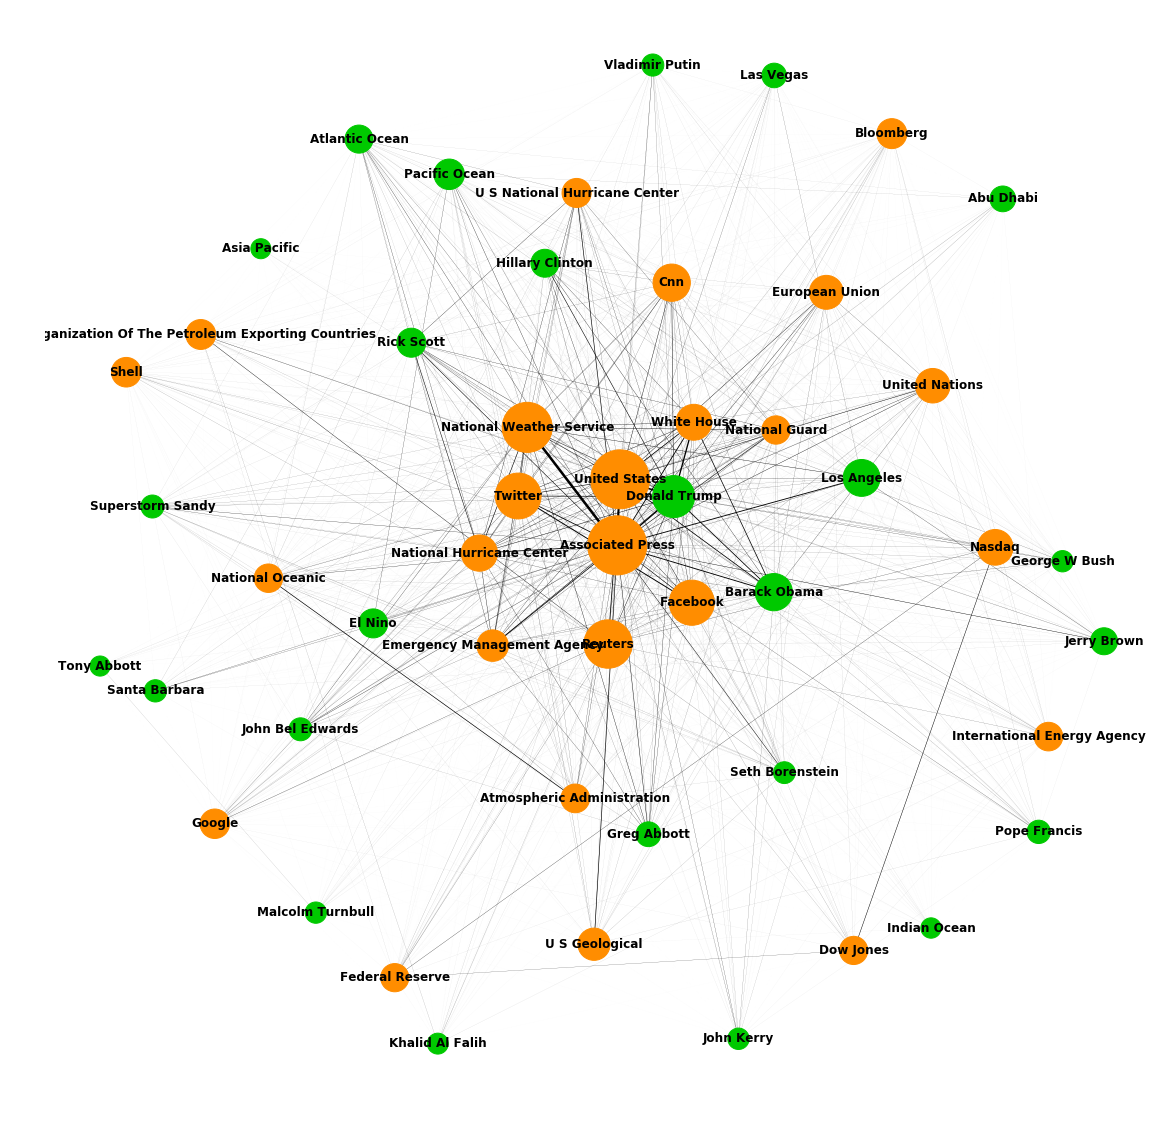

In [3]:
plot_occ_graph(DATA_PATH, 'global_actors_co-occurences_25.zip', 25, 0.01, 0.6, 7, 20)

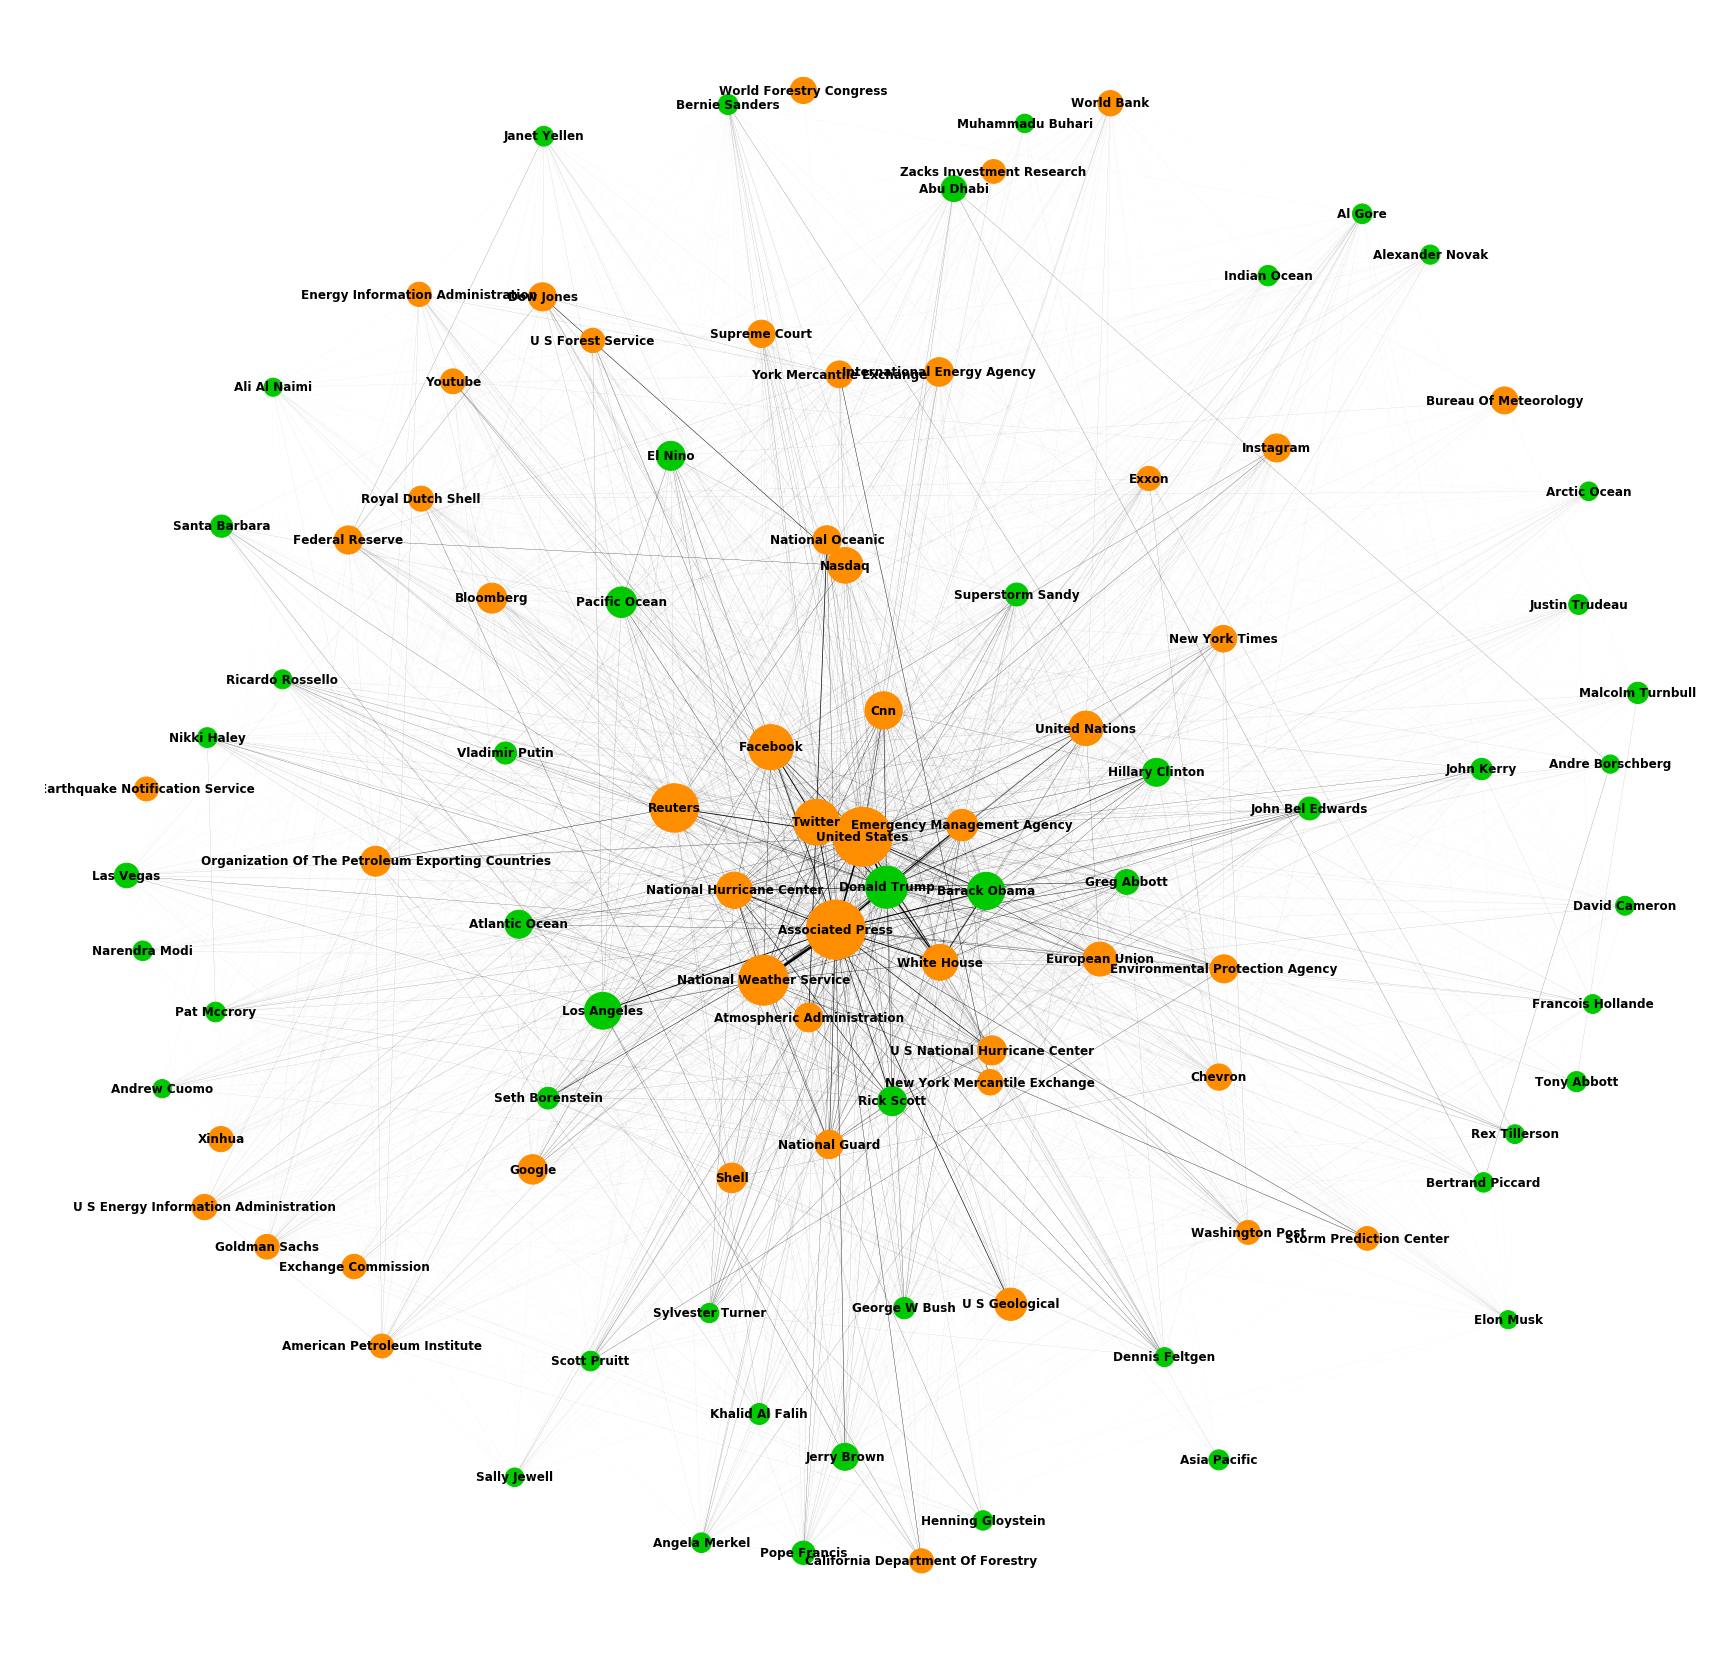

In [5]:
plot_occ_graph(DATA_PATH, 'global_actors_co-occurences_50.zip', 50, 0.01, 0.6, 7, 30)